In [ ]:
!nvidia-smi

Sat Jul 12 16:10:45 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   62C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
print("Yes" if __import__("torch").cuda.is_available() else "No")



Yes


In [ ]:
!pip install Augmentor
!pip install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import cv2
import math
import os
import zipfile
import random
import shutil
import Augmentor
from sklearn.model_selection import train_test_split
from ultralytics import YOLO
from PIL import Image
from IPython.display import display

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
dataset_path = "/content/drive/MyDrive/mabusising liver components.v1-preprocessed-and-augmented.yolov11"  # ✅ Bas direct folder ka path de

print("✅ Dataset Path Set:", dataset_path)


✅ Dataset Path Set: /content/drive/MyDrive/mabusising liver components.v1-preprocessed-and-augmented.yolov11


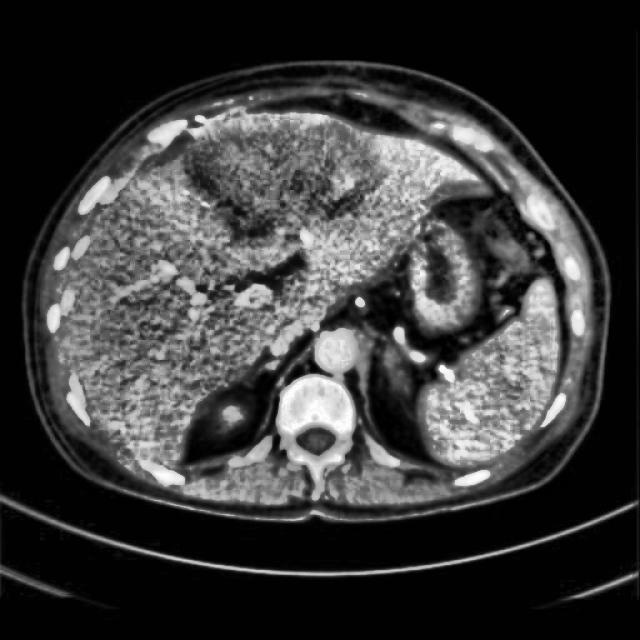

In [ ]:
sample_image = Image.open('/content/drive/MyDrive/mabusising liver components.v1-preprocessed-and-augmented.yolov11/train/images/DataSet10_Abscess_png.rf.08a393b62233298de8b653f62b6ed0fe.jpg')
sample_image

In [ ]:
sample_image.size

(640, 640)

<ipython-input-13-fe7a1d845148>:60: UserWarning: Glyph 128248 (\N{CAMERA WITH FLASH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128248 (\N{CAMERA WITH FLASH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


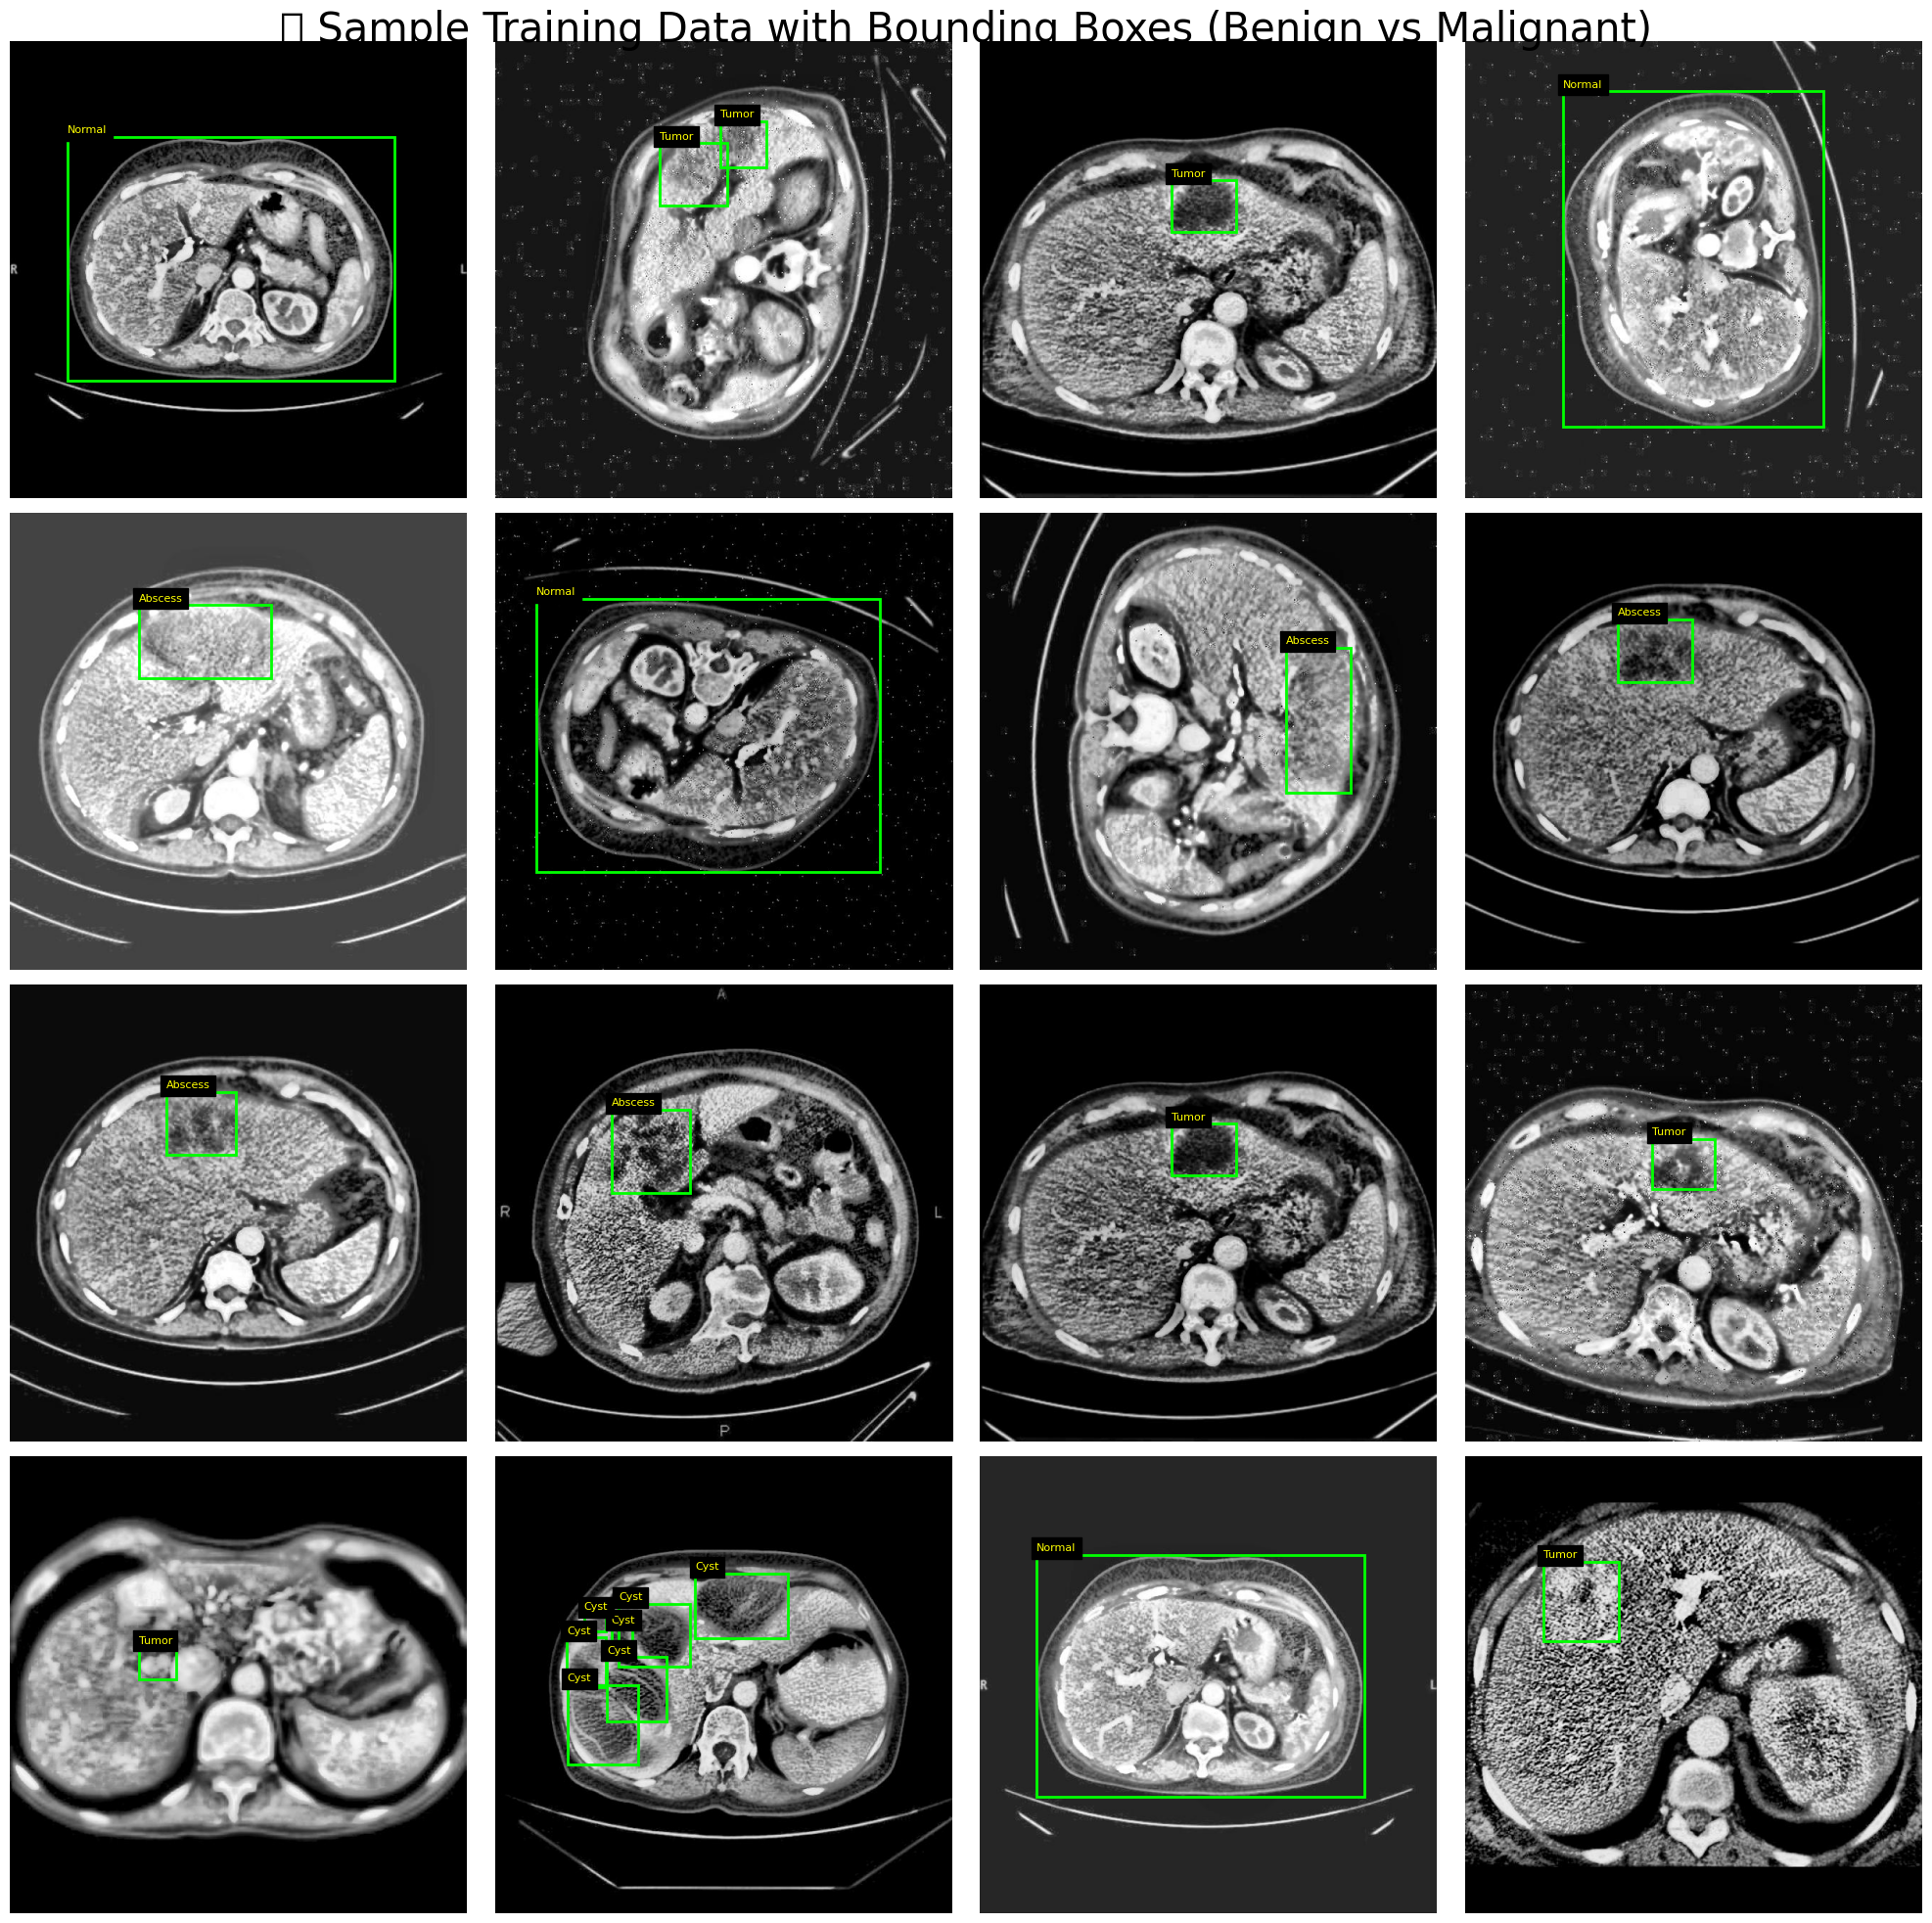

In [ ]:
import matplotlib.patches as patches
import random
from glob import glob

# 🎯 Plotting Training Images with Bounding Boxes
image_dir = f"{dataset_path}/train/images"
label_dir = f"{dataset_path}/train/labels"

# Define class names based on your dataset
class_names = {
    0: "Abscess",
    1: "Cyst",
    2: "Normal",
    3: "Tumor"
}

image_files = glob(f"{image_dir}/*.jpg")

# Randomly pick 16 images
sample_images = random.sample(image_files, 16)

fig, axes = plt.subplots(4, 4, figsize=(20, 20))

for ax, img_path in zip(axes.flatten(), sample_images):
    # Load Image
    img = plt.imread(img_path)
    img_height, img_width = img.shape[:2]

    # Load corresponding Label (.txt file)
    label_path = os.path.join(label_dir, os.path.basename(img_path).replace('.jpg', '.txt'))

    ax.imshow(img)

    if os.path.exists(label_path):
        with open(label_path, 'r') as file:
            lines = file.readlines()

        for line in lines:
            cls, cx, cy, w, h = map(float, line.strip().split())

            # Convert YOLO format to box coordinates
            x_min = (cx - w/2) * img_width
            y_min = (cy - h/2) * img_height
            box_w = w * img_width
            box_h = h * img_height

            # Draw Rectangle
            bbox = patches.Rectangle((x_min, y_min), box_w, box_h,
                                      linewidth=2, edgecolor='lime', facecolor='none')
            ax.add_patch(bbox)

            # Put class label above box
            class_name = class_names.get(int(cls), "Unknown")
            ax.text(x_min, y_min - 5, f"{class_name}", color='yellow',
                    fontsize=8, backgroundcolor="black")

    ax.axis('off')

plt.suptitle("📸 Sample Training Data with Bounding Boxes (Benign vs Malignant)", fontsize=30)
plt.tight_layout()
plt.show()


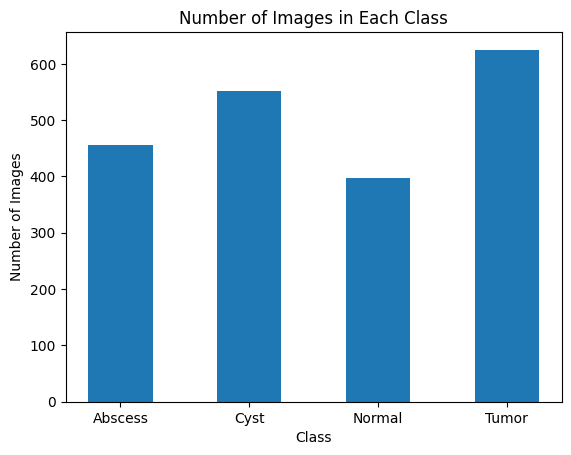

In [ ]:
class_names = ['Abscess', 'Cyst', 'Normal', 'Tumor']
class_counts = [456, 551, 398, 625]

plt.bar(class_names, class_counts, width=0.5)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class')
plt.show()

In [ ]:
def custom_train_test_split_yolo(dataset_path, test_size=0.2, random_seed=42):
    """
    Custom train-test split function specifically for YOLO format datasets.
    Moves images and their corresponding labels (.txt files) into 'train' and 'test' folders.
    """
    # 📂 Source folders
    images_path = os.path.join(dataset_path, 'train', 'images')  # Updated to directly point to train images
    labels_path = os.path.join(dataset_path, 'train', 'labels')  # Updated to directly point to train labels

    # 📂 Create new train and test folders
    train_images_path = os.path.join(dataset_path, 'train', 'images')
    train_labels_path = os.path.join(dataset_path, 'train', 'labels')
    test_images_path = os.path.join(dataset_path, 'test', 'images')
    test_labels_path = os.path.join(dataset_path, 'test', 'labels')

    os.makedirs(train_images_path, exist_ok=True)
    os.makedirs(train_labels_path, exist_ok=True)
    os.makedirs(test_images_path, exist_ok=True)
    os.makedirs(test_labels_path, exist_ok=True)

    # 📸 Load all image files
    image_files = glob(os.path.join(images_path, "*.jpg"))

    # Check if image_files is empty and print the images path for debugging
    if not image_files:
        print(f"No .jpg images found in {images_path}. Please check the path and file extensions.")
        return  # Exit the function early to prevent errors

    # ✂️ Split images into train and test
    train_files, test_files = train_test_split(image_files, test_size=test_size, random_state=random_seed)

    # 🚚 Move files
    for file_list, img_dest, lbl_dest in [(train_files, train_images_path, train_labels_path),
                                          (test_files, test_images_path, test_labels_path)]:
        for img_file in file_list:
            # Move Image
            shutil.copy(img_file, img_dest)

            # Move corresponding Label
            label_file = os.path.join(labels_path, os.path.basename(img_file).replace('.jpg', '.txt'))
            if os.path.exists(label_file):
                shutil.copy(label_file, lbl_dest)

    print(f"✅ Dataset Split Done! ({len(train_files)} train images, {len(test_files)} test images)")

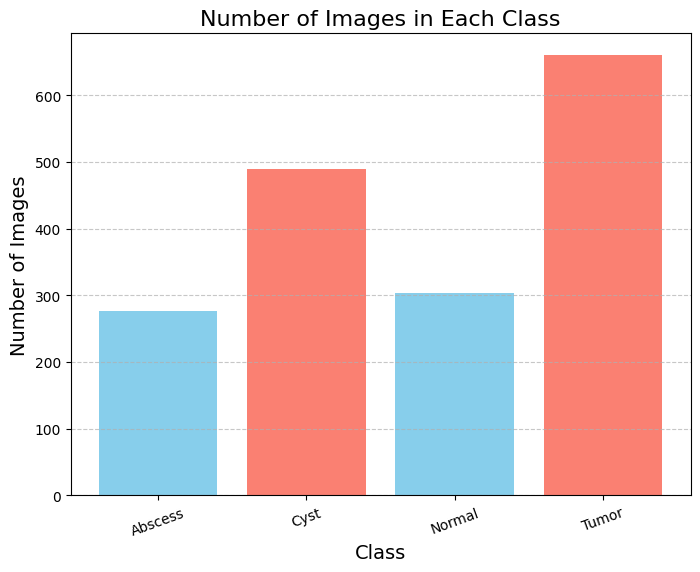

In [ ]:
# 📂 Correct Paths
dataset_directory = '/content/drive/MyDrive/mabusising liver components.v1-preprocessed-and-augmented.yolov11'
images_directory = os.path.join(dataset_directory, 'train', 'images') #added train in the path
labels_directory = os.path.join(dataset_directory, 'train', 'labels')  # Changed to point to the 'labels' directory #added train in the path

# 🏷️ Class Mapping
class_labels = { 0: "Abscess",
    1: "Cyst",
    2: "Normal",
    3: "Tumor"}

# 🔢 Count Images per Class based on label files
def count_images_per_class_from_labels(labels_directory, class_names={0: 'Benign', 1: 'Malignant'}):
    class_counts = {class_name: 0 for class_name in class_names.values()}

    label_files = [f for f in os.listdir(labels_directory) if f.endswith('.txt')]

    for label_file in label_files:
        label_path = os.path.join(labels_directory, label_file)
        with open(label_path, 'r') as f:
            lines = f.readlines()
            for line in lines:
                class_id = int(line.strip().split()[0])
                class_name = class_names.get(class_id)
                if class_name:
                    class_counts[class_name] += 1

    return class_counts

# 📊 Plot Image Counts
def plot_image_counts(labels_directory, class_names={0: "Abscess", 1: "Cyst", 2: "Normal", 3: "Tumor"}):
    """
    Plot the number of images in each class based on label files.
    """
    counts = count_images_per_class_from_labels(labels_directory, class_names)

    class_names_list = list(counts.keys())
    counts_values = list(counts.values())

    fig, ax = plt.subplots(figsize=(8,6))
    ax.bar(class_names_list, counts_values, color=['skyblue', 'salmon'])
    ax.set_xlabel('Class', fontsize=14)
    ax.set_ylabel('Number of Images', fontsize=14)
    ax.set_title('Number of Images in Each Class', fontsize=16)
    plt.xticks(rotation=20)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# 📈 Run
plot_image_counts(labels_directory, class_labels)

In [ ]:
import torch
print(torch.cuda.is_available())

True


In [ ]:
from ultralytics import YOLO

# yolov11l.pt ko load karna (pre-trained weights hone chahiye is file mein)
yolo_btd_model = YOLO('yolov10x.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 61.4M/61.4M [00:00<00:00, 64.9MB/s]


In [ ]:
from ultralytics import YOLO

yolo_btd_model = YOLO('yolov10x.pt')

yolo_btd_model.train(
    data=r'/content/drive/MyDrive/mabusising liver components.v1-preprocessed-and-augmented.yolov11/data.yaml',
    imgsz=416,
    epochs=100,
    lr0=0.001,
    optimizer='AdamW',
    warmup_epochs=5,
    batch=4, # Reduced batch size to 1
    degrees=10,
    translate=0.1,
    scale=0.5,
    shear=0.1,
    perspective=0.0005,
    flipud=0.5,
    fliplr=0.5,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    mosaic=1.0,
    mixup=0.2,
    patience=50,
    cos_lr=True,
    device=0,
    workers=4,
    project='/content/drive/MyDrive/liver_detection_project',
    name='yolov10x_tuned_training',
    exist_ok=True
)

Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/drive/MyDrive/mabusising liver components.v1-preprocessed-and-augmented.yolov11/data.yaml, degrees=10, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolov10x.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov10x_tuned_training, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW

train: Scanning /content/drive/MyDrive/mabusising liver components.v1-preprocessed-and-augmented.yolov11/train/labels.cache... 1326 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1326/1326 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 2.5±4.1 ms, read: 10.1±10.4 MB/s, size: 55.3 KB)


val: Scanning /content/drive/MyDrive/mabusising liver components.v1-preprocessed-and-augmented.yolov11/valid/labels.cache... 124 images, 1 backgrounds, 0 corrupt: 100%|██████████| 124/124 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/liver_detection_project/yolov10x_tuned_training/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 185 weight(decay=0.0), 198 weight(decay=0.0005), 197 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/liver_detection_project/yolov10x_tuned_training
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.95G      3.342      5.307      3.673          6        416: 100%|██████████| 332/332 [04:53<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.96it/s]

                   all        124        131      0.363      0.389      0.308      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.29G      3.371      4.711      3.726          4        416: 100%|██████████| 332/332 [01:22<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.86it/s]

                   all        124        131      0.265      0.485      0.394       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100       3.3G      3.436      4.685      3.765          4        416: 100%|██████████| 332/332 [01:32<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.59it/s]

                   all        124        131       0.28      0.415      0.349      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.37G      3.373      4.692      3.677         12        416: 100%|██████████| 332/332 [01:24<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.73it/s]

                   all        124        131       0.33      0.443      0.389      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.39G      3.302      4.457      3.651          4        416: 100%|██████████| 332/332 [01:29<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.73it/s]

                   all        124        131      0.395      0.555      0.441      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.42G      3.235      4.298      3.603          9        416: 100%|██████████| 332/332 [01:24<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.10it/s]

                   all        124        131      0.407      0.579      0.487      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.64G      3.107      4.051      3.482          9        416: 100%|██████████| 332/332 [01:29<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.17it/s]

                   all        124        131      0.375      0.455      0.462      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       3.7G      3.109      4.001      3.464          6        416: 100%|██████████| 332/332 [01:26<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.68it/s]

                   all        124        131      0.434       0.59      0.537      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100       3.7G      3.077      3.805      3.442          5        416: 100%|██████████| 332/332 [01:28<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.89it/s]

                   all        124        131      0.502      0.536      0.533      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       3.7G       3.03      3.703      3.394          6        416: 100%|██████████| 332/332 [01:27<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.64it/s]

                   all        124        131      0.561      0.548      0.564      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       3.7G       2.98      3.567      3.364          5        416: 100%|██████████| 332/332 [01:28<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.70it/s]

                   all        124        131      0.514      0.627      0.594      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       3.7G      2.929       3.43      3.343          4        416: 100%|██████████| 332/332 [01:28<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.87it/s]

                   all        124        131      0.479      0.611      0.578       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       3.7G      2.969      3.478      3.295          8        416: 100%|██████████| 332/332 [01:22<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.70it/s]

                   all        124        131      0.457      0.697      0.643      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.71G      2.934      3.521      3.271         12        416: 100%|██████████| 332/332 [01:28<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.15it/s]

                   all        124        131       0.48      0.563      0.577      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.71G      2.867      3.387      3.272          3        416: 100%|██████████| 332/332 [01:23<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.63it/s]

                   all        124        131      0.618      0.658      0.673      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.71G       2.89       3.33      3.259          6        416: 100%|██████████| 332/332 [01:27<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.74it/s]

                   all        124        131      0.603      0.723      0.693      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.71G       2.82      3.122      3.267          4        416: 100%|██████████| 332/332 [01:23<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.75it/s]

                   all        124        131       0.79      0.667       0.77      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.71G      2.799      3.091      3.256          4        416: 100%|██████████| 332/332 [01:28<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.84it/s]

                   all        124        131      0.627      0.674      0.671      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.71G      2.739      3.012      3.208          5        416: 100%|██████████| 332/332 [01:23<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.06it/s]

                   all        124        131       0.72      0.665      0.735      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.71G      2.792      3.061      3.225          5        416: 100%|██████████| 332/332 [01:23<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.79it/s]

                   all        124        131      0.698      0.658      0.703      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.71G      2.776      2.997      3.191          4        416: 100%|██████████| 332/332 [01:22<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.41it/s]

                   all        124        131      0.676      0.713      0.758      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.71G      2.757      2.904      3.232          2        416: 100%|██████████| 332/332 [01:22<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.64it/s]

                   all        124        131      0.756      0.642       0.72      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.71G      2.763      2.857       3.19          2        416: 100%|██████████| 332/332 [01:27<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.75it/s]

                   all        124        131      0.783      0.634       0.74      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.71G      2.692      2.749      3.141          5        416: 100%|██████████| 332/332 [01:23<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.45it/s]

                   all        124        131      0.684      0.632      0.691      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.71G      2.709      2.777      3.162          8        416: 100%|██████████| 332/332 [01:22<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.78it/s]

                   all        124        131      0.807      0.639      0.767       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.71G      2.686      2.753      3.186          8        416: 100%|██████████| 332/332 [01:23<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.61it/s]

                   all        124        131      0.795      0.779      0.813      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.71G      2.707      2.665      3.152          6        416: 100%|██████████| 332/332 [01:29<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.97it/s]

                   all        124        131      0.784      0.767      0.813      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.71G      2.681       2.61      3.128          7        416: 100%|██████████| 332/332 [01:33<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.83it/s]

                   all        124        131      0.768      0.709      0.773      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.71G      2.736      2.706      3.122         10        416: 100%|██████████| 332/332 [01:23<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.45it/s]

                   all        124        131      0.797      0.727      0.794      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.71G      2.646        2.6      3.119          5        416: 100%|██████████| 332/332 [01:26<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.69it/s]

                   all        124        131      0.794      0.754      0.823      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.71G      2.629      2.562      3.088          5        416: 100%|██████████| 332/332 [01:29<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.74it/s]

                   all        124        131      0.847      0.719      0.835      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.71G      2.652       2.52      3.098          4        416: 100%|██████████| 332/332 [01:29<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.86it/s]

                   all        124        131      0.837      0.739      0.824      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.71G      2.618      2.495      3.102          9        416: 100%|██████████| 332/332 [01:30<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.79it/s]

                   all        124        131        0.8      0.757      0.837      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.71G      2.613      2.496      3.066          3        416: 100%|██████████| 332/332 [01:30<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.68it/s]

                   all        124        131       0.79      0.718      0.806      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.71G      2.567      2.367      3.021          5        416: 100%|██████████| 332/332 [01:24<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.01it/s]

                   all        124        131      0.828      0.755      0.832      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.71G      2.554      2.332      3.017          1        416: 100%|██████████| 332/332 [01:24<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.79it/s]

                   all        124        131      0.831      0.774      0.856      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.71G      2.562      2.355       3.04          4        416: 100%|██████████| 332/332 [01:24<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.04it/s]

                   all        124        131      0.821      0.788      0.795      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.71G      2.619      2.333      3.062          2        416: 100%|██████████| 332/332 [01:23<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.66it/s]

                   all        124        131      0.873      0.816      0.906      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.71G      2.599       2.27      3.079          3        416: 100%|██████████| 332/332 [01:32<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.77it/s]

                   all        124        131      0.842      0.822      0.889      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.71G      2.572      2.233      3.004         10        416: 100%|██████████| 332/332 [01:26<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.83it/s]

                   all        124        131      0.799      0.821      0.877      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.71G      2.489      2.086      2.984          6        416: 100%|██████████| 332/332 [01:29<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.80it/s]

                   all        124        131      0.896      0.828      0.901      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.71G      2.508      2.142      3.009          5        416: 100%|██████████| 332/332 [01:22<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.19it/s]

                   all        124        131      0.896      0.797      0.904       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.71G      2.474      2.144      2.977          6        416: 100%|██████████| 332/332 [01:29<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.71it/s]

                   all        124        131      0.826      0.818      0.876      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.71G      2.532      2.129      2.989          7        416: 100%|██████████| 332/332 [01:23<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.97it/s]

                   all        124        131      0.906      0.797      0.906      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.71G      2.484       2.12      2.948          4        416: 100%|██████████| 332/332 [01:24<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.76it/s]

                   all        124        131      0.879      0.836      0.922      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.71G      2.462      2.083      2.942         10        416: 100%|██████████| 332/332 [01:24<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.87it/s]

                   all        124        131      0.915      0.831      0.912       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.71G      2.431       2.16      2.913          2        416: 100%|██████████| 332/332 [01:29<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.99it/s]

                   all        124        131      0.848      0.863       0.91      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.71G       2.45      1.995      2.906          4        416: 100%|██████████| 332/332 [01:23<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.68it/s]

                   all        124        131      0.913      0.857      0.935      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.71G      2.455      2.034      2.925          3        416: 100%|██████████| 332/332 [01:29<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.77it/s]

                   all        124        131        0.9      0.847      0.927      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.71G      2.431      2.015      2.928          4        416: 100%|██████████| 332/332 [01:23<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.10it/s]

                   all        124        131      0.856       0.87      0.903      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.71G      2.385      1.954      2.882          7        416: 100%|██████████| 332/332 [01:23<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.74it/s]

                   all        124        131      0.901      0.836      0.927      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.71G      2.333      1.869      2.839         11        416: 100%|██████████| 332/332 [01:23<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.18it/s]

                   all        124        131      0.929      0.778      0.923       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.71G      2.406      1.858      2.894          3        416: 100%|██████████| 332/332 [01:23<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.79it/s]

                   all        124        131      0.965      0.803      0.929      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.71G       2.37      1.859      2.854          5        416: 100%|██████████| 332/332 [01:23<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.80it/s]

                   all        124        131      0.887      0.827       0.92      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.71G       2.35      1.823      2.842          5        416: 100%|██████████| 332/332 [01:23<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.82it/s]

                   all        124        131      0.957      0.794      0.915       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.71G      2.366      1.887      2.845          5        416: 100%|██████████| 332/332 [01:23<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.82it/s]

                   all        124        131      0.932      0.853      0.939      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.71G      2.332      1.777      2.807          8        416: 100%|██████████| 332/332 [01:29<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.70it/s]

                   all        124        131      0.917      0.881      0.918      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.71G      2.347      1.816      2.861          3        416: 100%|██████████| 332/332 [01:25<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.18it/s]

                   all        124        131      0.945      0.845      0.929      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.71G      2.334      1.794      2.826          9        416: 100%|██████████| 332/332 [01:23<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.82it/s]

                   all        124        131      0.892      0.824      0.908       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.71G      2.267      1.744      2.819          1        416: 100%|██████████| 332/332 [01:24<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.39it/s]

                   all        124        131      0.952      0.801      0.936      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.71G      2.271      1.743      2.802          6        416: 100%|██████████| 332/332 [01:23<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.78it/s]

                   all        124        131      0.938      0.896      0.939      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.71G      2.239        1.7      2.754          5        416: 100%|██████████| 332/332 [01:23<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.06it/s]

                   all        124        131       0.92      0.889      0.938      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.71G      2.302      1.741      2.806          8        416: 100%|██████████| 332/332 [01:23<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.61it/s]

                   all        124        131      0.954      0.882      0.957      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.71G      2.257      1.636      2.774          7        416: 100%|██████████| 332/332 [01:27<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.74it/s]

                   all        124        131      0.892      0.887      0.936      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.71G      2.223      1.676      2.773          5        416: 100%|██████████| 332/332 [01:32<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.86it/s]

                   all        124        131       0.91      0.893      0.949      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.71G      2.216      1.662      2.767          6        416: 100%|██████████| 332/332 [01:23<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.68it/s]

                   all        124        131      0.898      0.901      0.947      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.71G      2.234      1.684      2.725          3        416: 100%|██████████| 332/332 [01:24<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.78it/s]

                   all        124        131      0.901       0.91       0.95      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.71G       2.16      1.545      2.721          3        416: 100%|██████████| 332/332 [01:23<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.74it/s]

                   all        124        131      0.902      0.882      0.945       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.71G      2.174      1.561      2.748          3        416: 100%|██████████| 332/332 [01:24<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.80it/s]

                   all        124        131      0.957      0.893      0.956      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.71G       2.18      1.563      2.728          4        416: 100%|██████████| 332/332 [01:28<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.83it/s]

                   all        124        131      0.944      0.845      0.947      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.71G       2.14      1.541      2.709          4        416: 100%|██████████| 332/332 [01:24<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.68it/s]

                   all        124        131      0.938      0.867      0.956      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.71G      2.205      1.528      2.732          6        416: 100%|██████████| 332/332 [01:29<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.68it/s]

                   all        124        131      0.922      0.899      0.948      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.71G      2.174      1.591      2.747          2        416: 100%|██████████| 332/332 [01:24<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.51it/s]

                   all        124        131      0.944       0.92      0.957      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.71G      2.166      1.479      2.721          6        416: 100%|██████████| 332/332 [01:23<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.80it/s]

                   all        124        131      0.902      0.941      0.958      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.71G      2.146      1.503      2.706          6        416: 100%|██████████| 332/332 [01:23<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.17it/s]

                   all        124        131      0.982      0.875      0.968       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.71G      2.105      1.474      2.686          9        416: 100%|██████████| 332/332 [01:28<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.49it/s]

                   all        124        131      0.947      0.914      0.959      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.71G      2.106      1.446      2.656          5        416: 100%|██████████| 332/332 [01:27<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.89it/s]

                   all        124        131      0.952      0.929      0.968      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.71G      2.064      1.455      2.628          7        416: 100%|██████████| 332/332 [01:23<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.77it/s]

                   all        124        131      0.907      0.928       0.96      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.71G      2.115      1.472      2.697          4        416: 100%|██████████| 332/332 [01:28<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.76it/s]

                   all        124        131      0.935      0.913      0.965      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.71G      2.054      1.412      2.661          3        416: 100%|██████████| 332/332 [01:23<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.82it/s]

                   all        124        131      0.961      0.898      0.971      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.71G      2.066      1.425      2.634         10        416: 100%|██████████| 332/332 [01:23<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.76it/s]

                   all        124        131      0.945      0.918      0.965      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.71G      2.024      1.382      2.613          2        416: 100%|██████████| 332/332 [01:23<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.72it/s]

                   all        124        131      0.962      0.918       0.97       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.71G       2.08      1.412       2.63          4        416: 100%|██████████| 332/332 [01:30<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.75it/s]

                   all        124        131       0.94      0.901      0.957       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.71G      2.084      1.409      2.686          8        416: 100%|██████████| 332/332 [01:23<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.79it/s]

                   all        124        131      0.979        0.9      0.962      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.71G      2.041      1.368      2.645          1        416: 100%|██████████| 332/332 [01:24<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.84it/s]

                   all        124        131      0.958      0.914      0.966      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.71G      1.994      1.334      2.608          4        416: 100%|██████████| 332/332 [01:23<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.70it/s]

                   all        124        131      0.952      0.916      0.964      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.71G      2.036      1.396      2.618          2        416: 100%|██████████| 332/332 [01:23<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.11it/s]

                   all        124        131       0.95      0.937      0.966       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.71G      2.014      1.354      2.628          2        416: 100%|██████████| 332/332 [01:29<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.86it/s]

                   all        124        131      0.969       0.93      0.962      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.71G      2.013      1.371      2.647          6        416: 100%|██████████| 332/332 [01:24<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.62it/s]

                   all        124        131      0.951      0.926      0.962       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.71G       2.06      1.418      2.635          1        416: 100%|██████████| 332/332 [01:24<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  5.99it/s]

                   all        124        131      0.968      0.907      0.962      0.637


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.71G      1.663     0.7791      2.522          2        416: 100%|██████████| 332/332 [01:27<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.86it/s]

                   all        124        131      0.937      0.931      0.959      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.71G      1.658     0.7208      2.512          2        416: 100%|██████████| 332/332 [01:21<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.51it/s]

                   all        124        131      0.968      0.908      0.958      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.71G       1.64      0.729      2.495         10        416: 100%|██████████| 332/332 [01:19<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.84it/s]

                   all        124        131      0.952      0.932      0.961       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.71G       1.64     0.6885       2.48          2        416: 100%|██████████| 332/332 [01:19<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.83it/s]

                   all        124        131      0.976      0.913       0.96      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.71G      1.663     0.7085        2.5          3        416: 100%|██████████| 332/332 [01:19<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.83it/s]

                   all        124        131       0.96       0.93      0.958      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.71G      1.615     0.6768      2.463          2        416: 100%|██████████| 332/332 [01:19<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.68it/s]

                   all        124        131       0.95      0.934      0.963      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.71G      1.621     0.7022      2.484          3        416: 100%|██████████| 332/332 [01:19<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.11it/s]

                   all        124        131      0.969      0.936      0.963      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.71G      1.604     0.6914      2.454          2        416: 100%|██████████| 332/332 [01:23<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.85it/s]

                   all        124        131      0.975       0.93      0.961       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.71G      1.585     0.6936      2.459          2        416: 100%|██████████| 332/332 [01:18<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.29it/s]

                   all        124        131      0.975      0.936      0.962      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.71G      1.561      0.665      2.436          2        416: 100%|██████████| 332/332 [01:23<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  7.87it/s]

                   all        124        131      0.971      0.934      0.961      0.644



100 epochs completed in 2.573 hours.
Optimizer stripped from /content/drive/MyDrive/liver_detection_project/yolov10x_tuned_training/weights/last.pt, 64.1MB
Optimizer stripped from /content/drive/MyDrive/liver_detection_project/yolov10x_tuned_training/weights/best.pt, 64.1MB

Validating /content/drive/MyDrive/liver_detection_project/yolov10x_tuned_training/weights/best.pt...
Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10x summary (fused): 192 layers, 29,400,380 parameters, 0 gradients, 160.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.09it/s]


                   all        124        131      0.972      0.934      0.961      0.644
               Abscess         27         27          1      0.882      0.959      0.574
                  Cyst         25         31      0.994          1      0.995      0.668
                Normal         32         32      0.963          1      0.985      0.816
                 Tumor         39         41       0.93      0.854      0.906      0.519
Speed: 0.2ms preprocess, 11.0ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to /content/drive/MyDrive/liver_detection_project/yolov10x_tuned_training


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bc459b2d7d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [ ]:
import shutil

# Path of the best.pt model after training
source_model_path = '/content/drive/MyDrive/liver_detection_project/yolov10x_tuned_training/weights/best.pt'  # ya jaha training hua waha ka path

# Path where you want to save in your Google Drive (near dataset)
destination_path = '/content/drive/MyDrive/mabusising liver components.v1-preprocessed-and-augmented.yolov11'

# Copy the model
shutil.copy(source_model_path, destination_path)

print(f"✅ Model saved successfully at {destination_path}")


✅ Model saved successfully at /content/drive/MyDrive/mabusising liver components.v1-preprocessed-and-augmented.yolov11


In [ ]:
def plot_images(image_paths):
    fig, axes = plt.subplots(len(image_paths), 1, figsize=(80, 80))

    for i, ax in enumerate(axes):
        image_path = image_paths[i]
        img = mpimg.imread(image_path)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(os.path.basename(image_path))

    plt.tight_layout()
    plt.show()

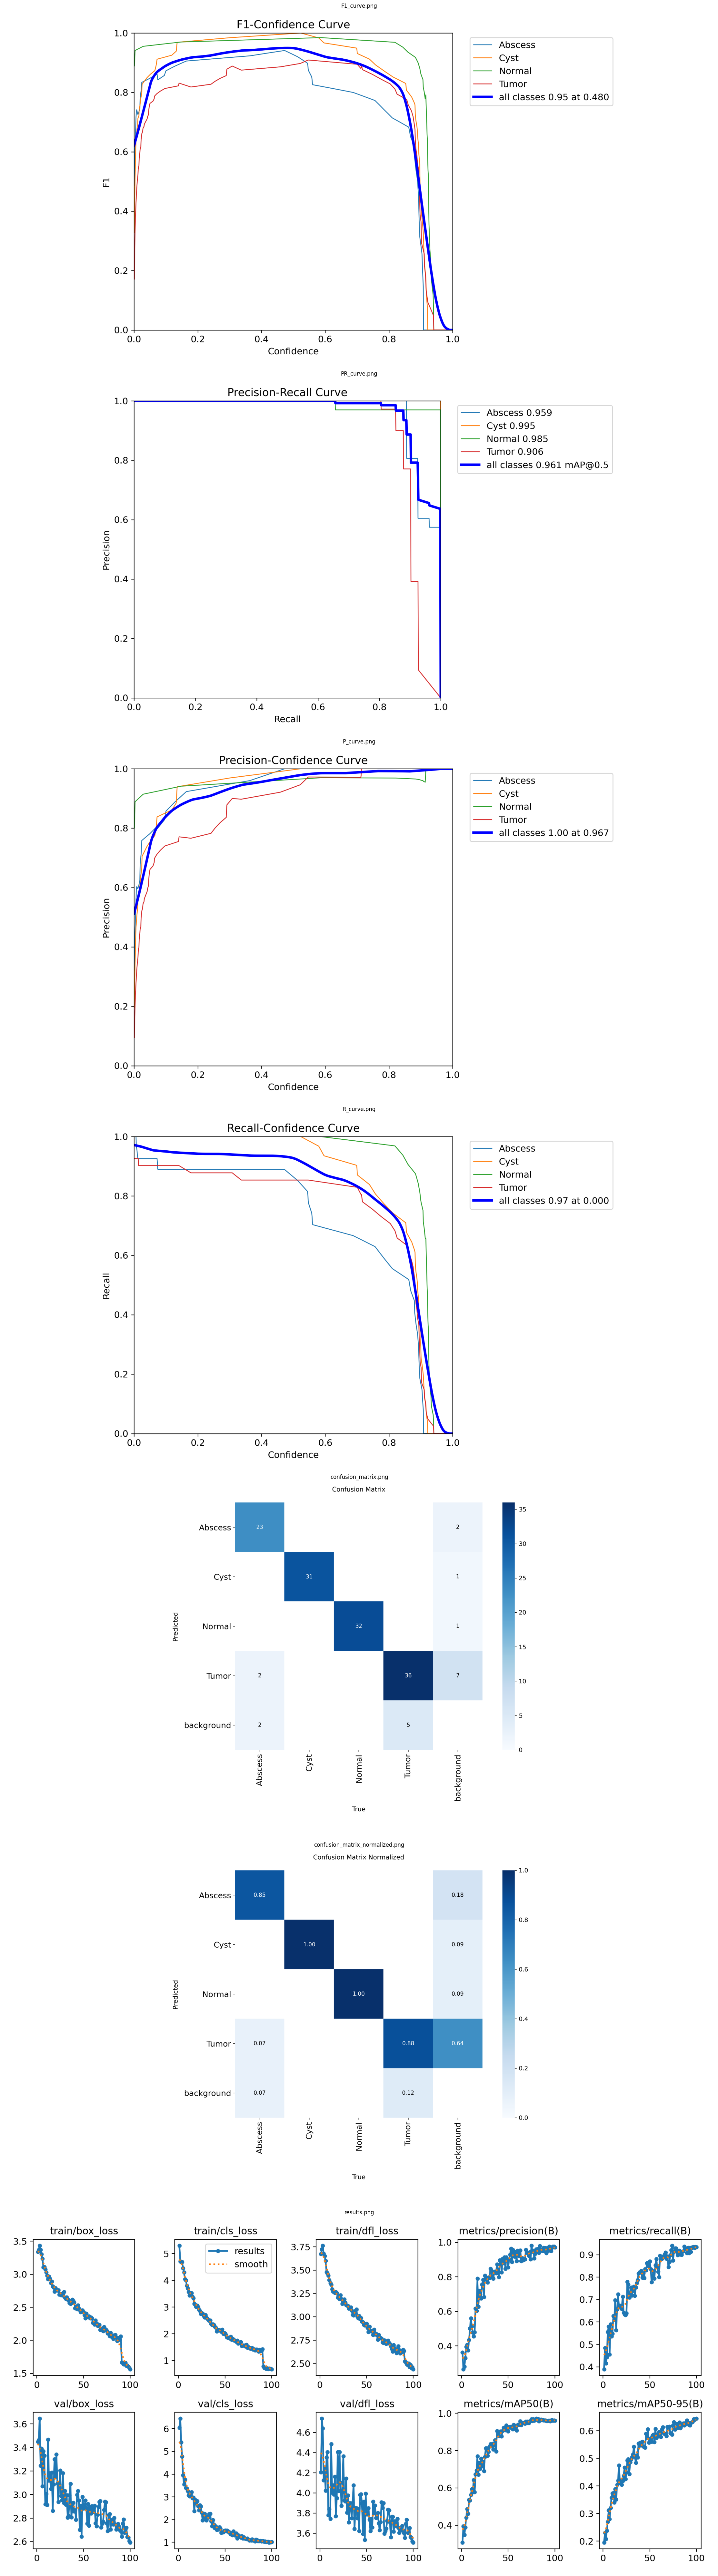

In [ ]:
image_paths = [
    '/content/drive/MyDrive/liver_detection_project/yolov10x_tuned_training/F1_curve.png',
    '/content/drive/MyDrive/liver_detection_project/yolov10x_tuned_training/PR_curve.png',
    '/content/drive/MyDrive/liver_detection_project/yolov10x_tuned_training/P_curve.png',
    '/content/drive/MyDrive/liver_detection_project/yolov10x_tuned_training/R_curve.png',
    '/content/drive/MyDrive/liver_detection_project/yolov10x_tuned_training/confusion_matrix.png',
    '/content/drive/MyDrive/liver_detection_project/yolov10x_tuned_training/confusion_matrix_normalized.png',
    '/content/drive/MyDrive/liver_detection_project/yolov10x_tuned_training/results.png',
]
plot_images(image_paths) # Calling the plot_images function with image_paths as argument